In [ ]:
from pandas import DataFrame
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")

In [ ]:
df.shape
df.describe

<bound method NDFrame.describe of      Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age    Status  
0                       0.627   50  Positive  
1                       0.351   31  Negative  
2                       0.672   32  Positive  
3                       0.167   21  Negative 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Status                    768 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 48.1+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in df.columns.values:
  if df[col].dtype=='object':
    data=df[col].append(df[col])
    le.fit(data.values)
    df[col]=le.transform(df[col])
df.head(10)

<ipython-input-5-41fb7417ea15>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=df[col].append(df[col])


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Status
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
6,78,50,32,88,31.0,0.248,26,1
7,115,0,0,0,35.3,0.134,29,0
8,197,70,45,543,30.5,0.158,53,1
9,125,96,0,0,0.0,0.232,54,1


In [ ]:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]=df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

In [ ]:
df.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Status
0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [ ]:
df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Status                        0
dtype: int64

In [ ]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Status'],
      dtype='object')

In [ ]:
df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Status                        0
dtype: int64

In [ ]:
# Replacing NaN with mean values
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [ ]:
df.describe
df.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Status
0,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(df)

In [ ]:
data1 = pd.DataFrame(dataset_scaled)
data1

,0,1,2,3,4,5,6,7
0,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1.0


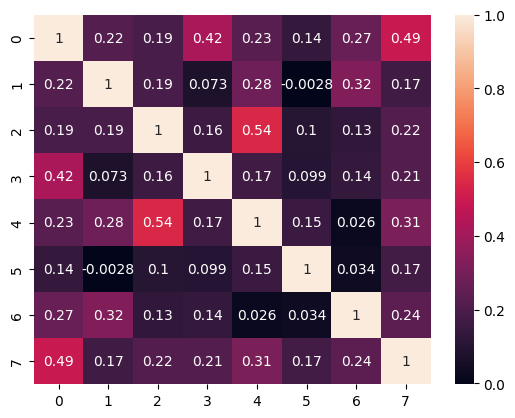

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap
sns.heatmap(data1.corr(), annot = True)
plt.show()

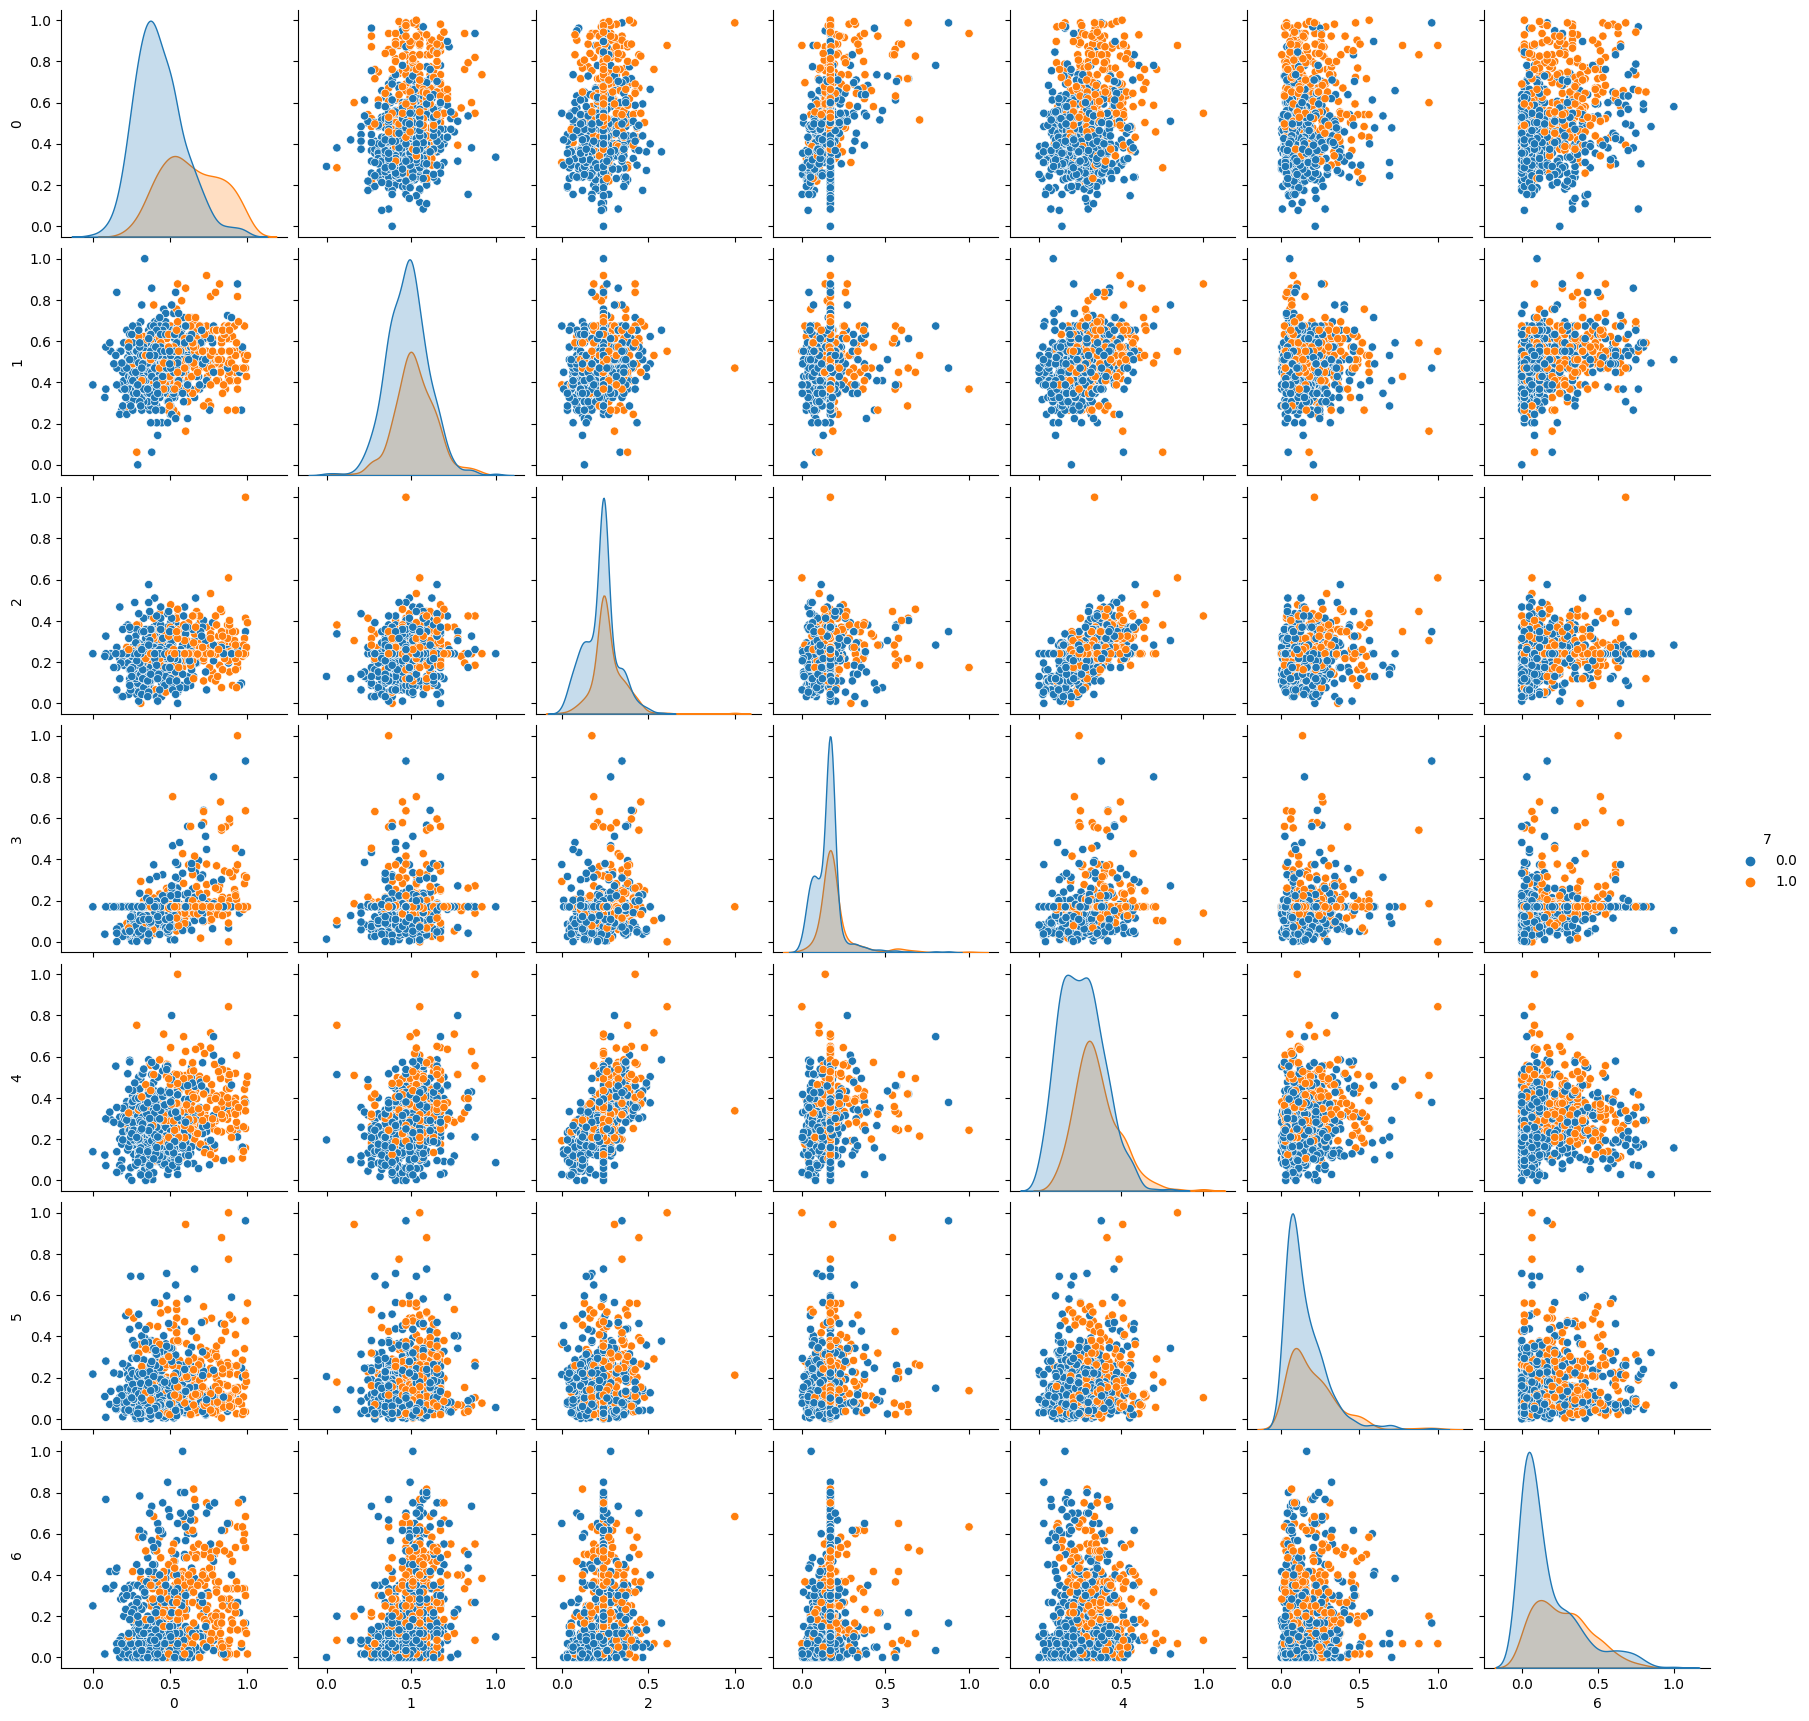

In [ ]:
# Detailed distribution of the features in the dataset
sns.pairplot(data=data1, hue=7)
plt.show()

In [ ]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Status'],
      dtype='object')

In [ ]:
# Selecting features - [Glucose, Insulin, BMI]
X = data1.iloc[:, [0, 3, 4]].values
Y = data1.iloc[:, 7].values

In [ ]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df['Status'] )

In [ ]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 3)
X_test shape: (154, 3)
Y_train shape: (614,)
Y_test shape: (154,)


In [ ]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [ ]:
print(KMeans_Clustering.cluster_centers_)

[[0.71411853 0.21796168 0.35414063]
 [0.38662377 0.13804041 0.25757952]]


In [ ]:
#prediction using kmeans and accuracy
kpred = KMeans_Clustering.predict(X_test)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test,kpred))

Classification report:

               precision    recall  f1-score   support

         0.0       0.44      0.24      0.31       100
         1.0       0.23      0.43      0.30        54

    accuracy                           0.31       154
   macro avg       0.33      0.33      0.31       154
weighted avg       0.36      0.31      0.31       154



Confusion Matrix :


<Axes: >

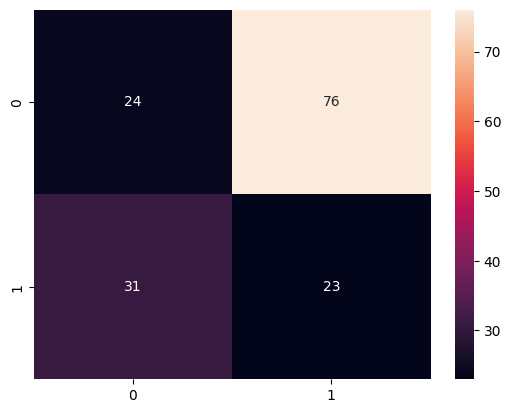

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
outcome_labels = sorted(df.Status.unique())
sns.heatmap(
    confusion_matrix(Y_test, kpred),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

In [ ]:
out = KMeans_Clustering.predict([[0.53,0.54,0.5253]])
if (out==0):
    print("No Diabetes")
else:
    print("Diabetes")

No Diabetes


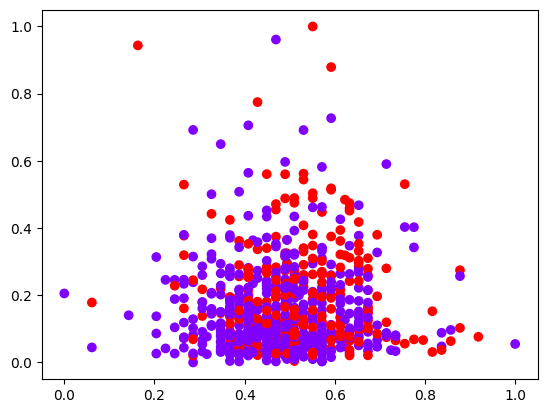

In [ ]:
#actual data
plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=df['Status'], cmap='rainbow')

In [ ]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

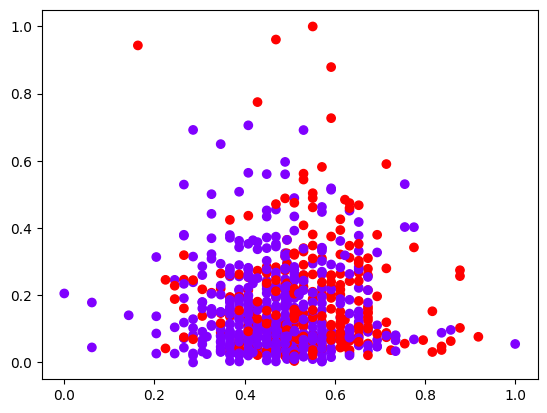

In [ ]:
#prediction
plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=KMeans_Clustering.labels_, cmap='rainbow')